In [ ]:
#all the imports
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
#read path and filenames from json
import json
with open('private.json', 'r') as fp:
    data = json.load(fp)
    
#
path = data["path"]
chosen_csv = data["chosen-csv"]

In [ ]:
#read the clean data
flies = pd.read_csv(path + chosen_csv, index_col = 0)

In [ ]:
#flies.shape
flies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1814 to 1607
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anglesub      1999 non-null   float64
 1   nflies_close  1999 non-null   float64
 2   conditioning  1999 non-null   object 
 3   velmag        1999 non-null   float64
 4   Chain         1999 non-null   float64
 5   Chase         1999 non-null   float64
 6   dcenter       1999 non-null   float64
 7   Grooming      1999 non-null   float64
dtypes: float64(7), object(1)
memory usage: 140.6+ KB


In [ ]:
flies.describe()

,anglesub,nflies_close,velmag,Chain,Chase,dcenter,Grooming
count,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03,1.999000e+03
mean,6.797964e-17,2.221557e-16,-1.563976e-16,8.708503e-17,2.488144e-17,1.777245e-16,1.421796e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-2.157535e+00,-1.072156e+00,-1.956553e+00,-9.365888e-01,-8.402066e-01,-3.140407e+00,-2.714453e+00
25%,-6.196404e-01,-5.981432e-01,-6.892887e-01,-6.684889e-01,-5.425928e-01,-4.907048e-01,-7.643611e-01
50%,-2.530209e-01,-3.395962e-01,-1.100797e-01,-3.651305e-01,-2.829695e-01,8.454912e-02,1.402632e-02
75%,3.220635e-01,1.584394e-01,5.853634e-01,2.864521e-01,1.410099e-01,6.169412e-01,7.620759e-01
max,1.044809e+01,5.858370e+00,3.738063e+00,5.972820e+00,1.217192e+01,7.620325e+00,2.649101e+00


In [ ]:
conditionings = flies["conditioning"].unique().tolist()
features = list(set(flies.columns) - set(["conditioning"]))

<AxesSubplot:xlabel='anglesub', ylabel='Count'>

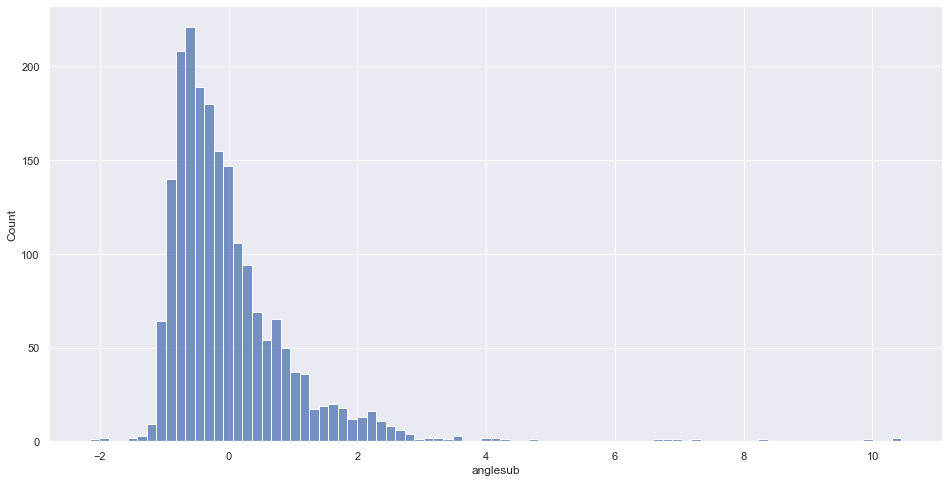

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'anglesub')

<AxesSubplot:xlabel='nflies_close', ylabel='Count'>

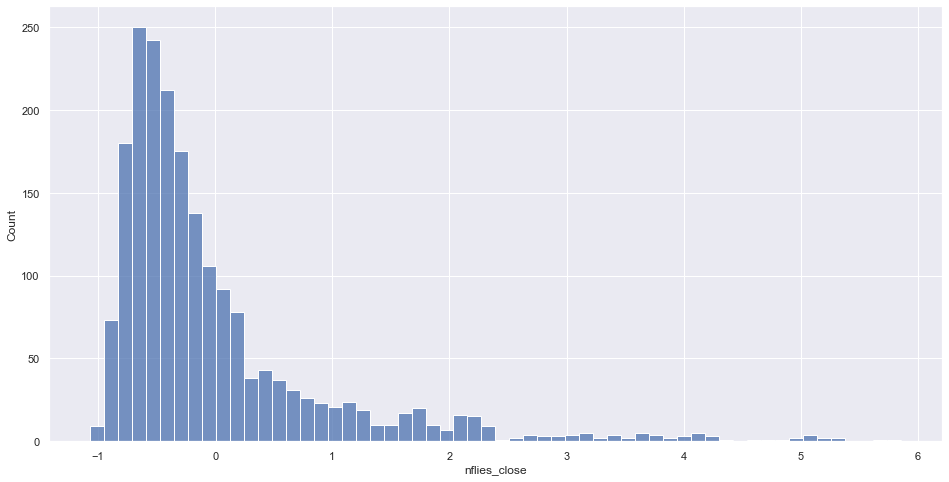

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'nflies_close')

<AxesSubplot:xlabel='velmag', ylabel='Count'>

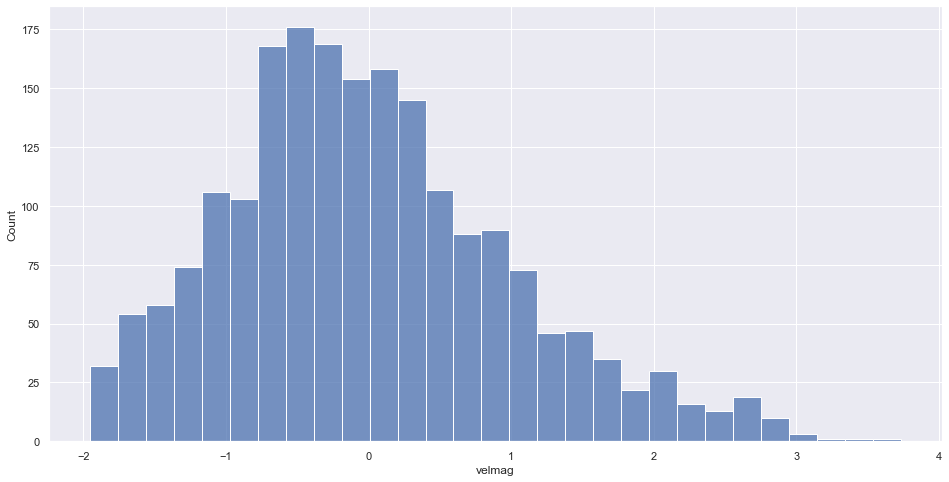

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'velmag')

<AxesSubplot:xlabel='Chain', ylabel='Count'>

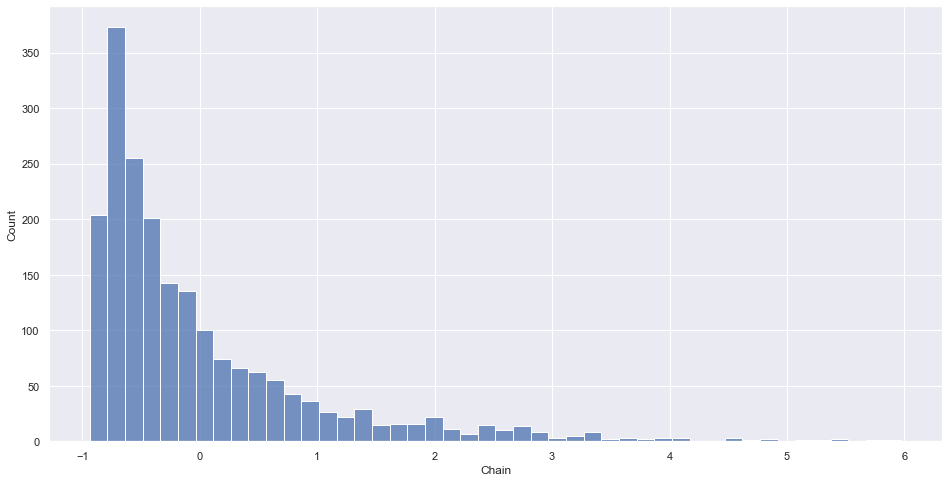

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'Chain')

<AxesSubplot:xlabel='Chase', ylabel='Count'>

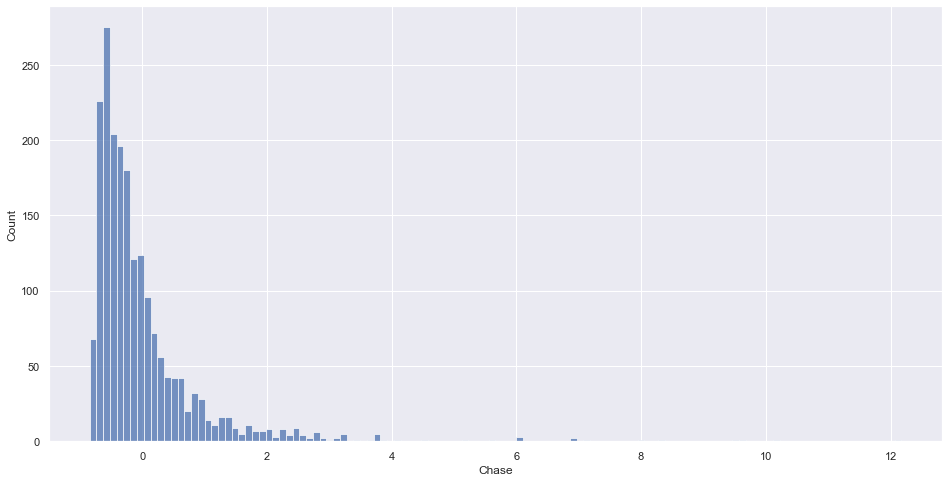

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'Chase')

<AxesSubplot:xlabel='dcenter', ylabel='Count'>

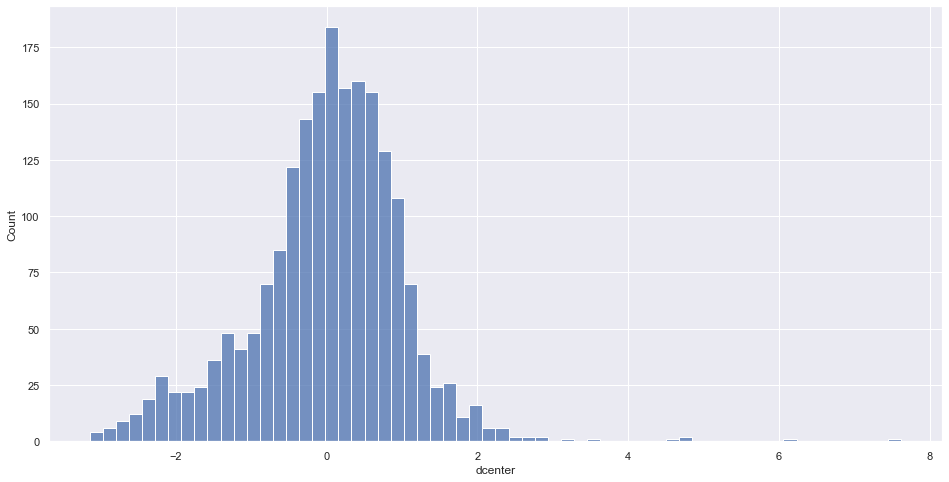

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'dcenter')

<AxesSubplot:xlabel='Grooming', ylabel='Count'>

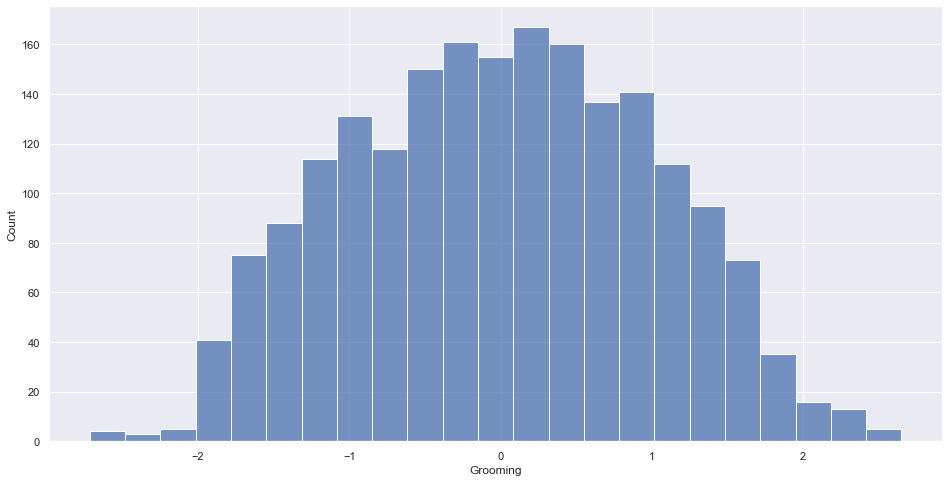

In [ ]:
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.histplot(data = flies, x = 'Grooming')

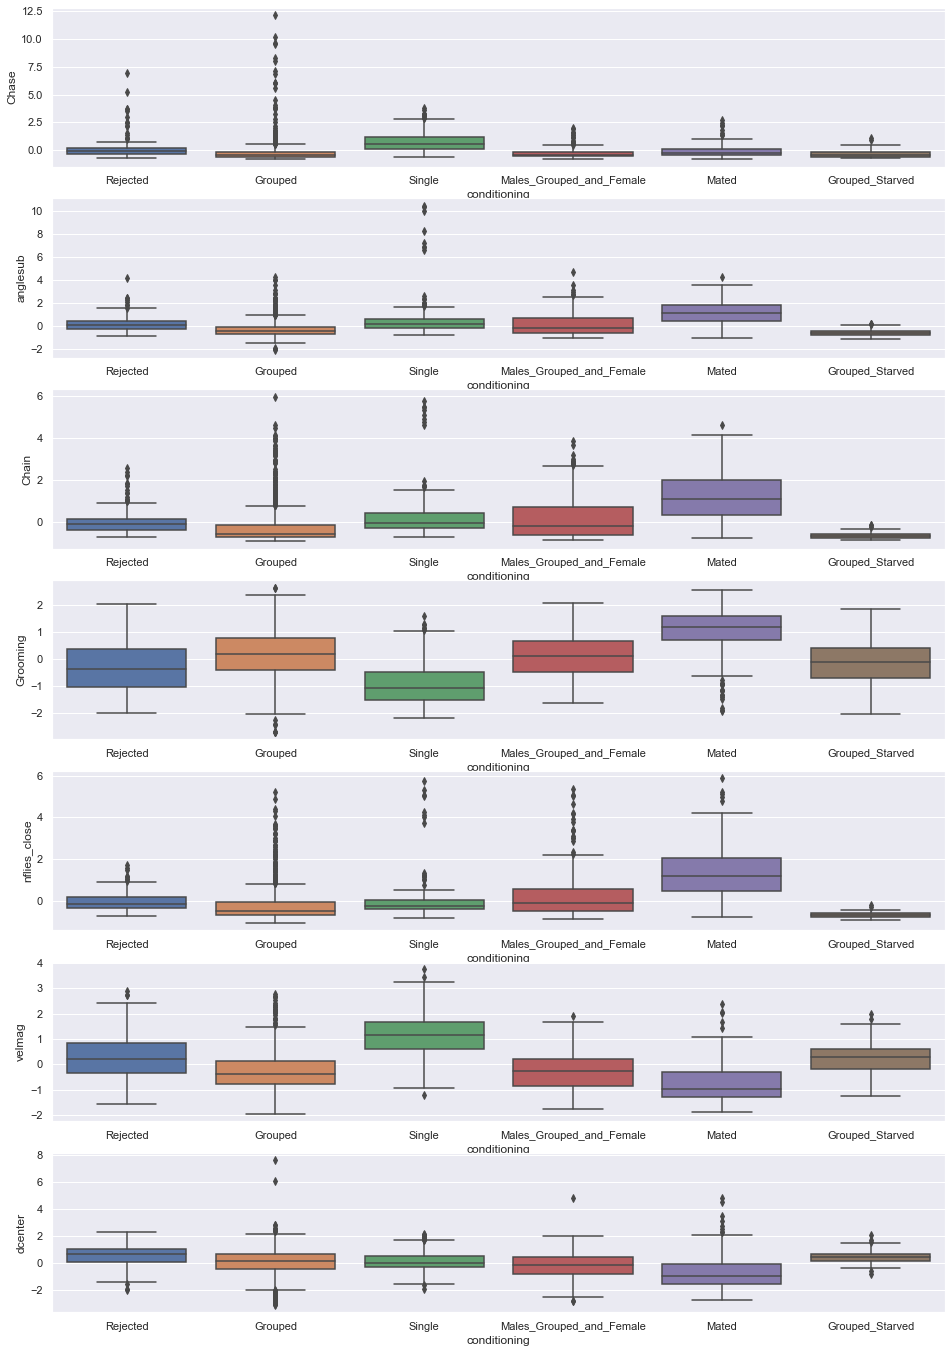

In [ ]:
fig, ax = plt.subplots(7, 1, figsize = (16, 24))
for feature, subplot in zip(features, ax.flatten()):
    sns.boxplot(x = 'conditioning', y = feature, data = flies, ax = subplot)

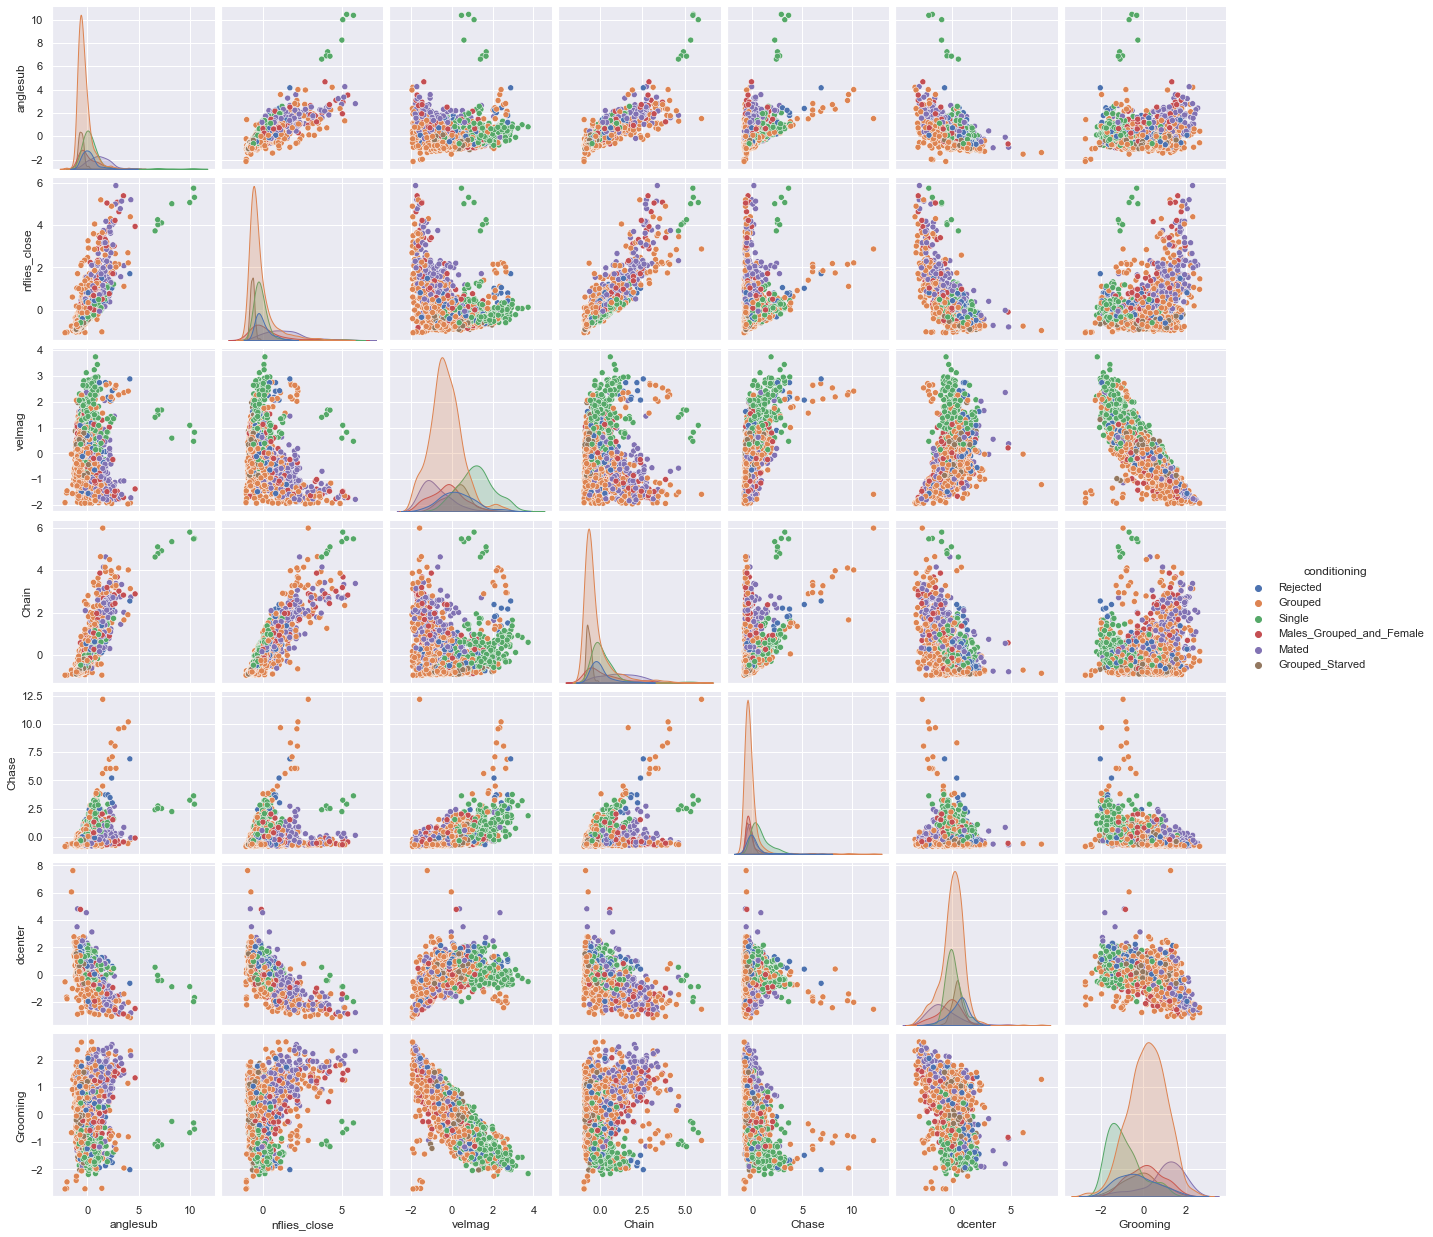

In [ ]:
#pairing plot of all the scoring
sns.pairplot(flies, hue = 'conditioning')